In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter
import random
%matplotlib inline

In [2]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')


In [3]:
def clean_data (dataset) :
    
    #Remove the rows having '?'
    dataset = dataset[~(dataset[columns] == '?').any(axis=1)]
    
    #Remove rows having 'NaN'
    dataset = dataset.dropna()
    
    #Reset index
    dataset = dataset.reset_index(drop=True)
    
    # Replace '>50K.' with '>50K' and '<=50K.' with '<=50K' 
    dataset = dataset.replace('>50K.', '>50K')
    dataset = dataset.replace('<=50K.', '<=50K')

    lower_range = dataset[dataset["Income"] == "<=50K"]
    upper_range = dataset[dataset["Income"] == ">50K"]
    
    dataset = pd.concat([upper_range, lower_range])
    dataset['range'] = (dataset["Income"] == ">50K")

#df.head()
    
    return dataset

In [4]:
def concatDataframe (dataset1, dataset2):
    return pd.concat([dataset1, dataset2], ignore_index=True)

In [5]:
def col_vs_income(labels, less_than_fifty, greater_than_fifty, title, xlabel, ylabel):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, less_than_fifty, width, label='<=50K')
    rects2 = ax.bar(x + width/2, greater_than_fifty, width, label='>50K')

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=90)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 5),  # 5 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

In [6]:
def get_count_df_normalized(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    #Normalize data
    col_income['Total'] = col_income['<=50K'] + col_income['>50K']
    col_income['<=50K%'] = round((col_income['<=50K'] / col_income['Total']) * 100)
    col_income['>50K%'] = round((col_income['>50K'] / col_income['Total']) * 100)
    col_income[colname] = col_income.T.columns

    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K%'].tolist(),
            '>50K':col_income['>50K%'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [7]:
def get_count_df_absolute(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Income']).size().unstack(level=0).T
    col_income[colname] = col_income.T.columns
    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K'].tolist(),
            '>50K':col_income['>50K'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [8]:
def plot_bar_chart(colname, title, xlabel, ylabel, abs_or_norm = False):
    if(abs_or_norm):
        col_income_dict = get_count_df_absolute(concatenate_dataset, colname) 
    else:
        col_income_dict = get_count_df_normalized(concatenate_dataset, colname)
    #Plot the comparision between WorkClass and Income
    col_vs_income(col_income_dict[colname].tolist(), col_income_dict['<=50K'].tolist(), col_income_dict['>50K'].tolist(), title, xlabel, ylabel)

In [9]:
def plot_box_plot(colname, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    sns.boxplot(ax=ax, x='Income', y=colname, data = train_data)

In [10]:
train_data = clean_data(train_data)
test_data = clean_data(test_data)
concatenate_dataset = concatDataframe(train_data, test_data)

C:\Users\Abhilash\AppData\Roaming\Python\Python36\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [11]:
concatenate_dataset

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,range
0,52,Self-emp-not-inc,209642.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K,True
1,31,Private,45781.0,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K,True
2,42,Private,159449.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K,True
3,37,Private,280464.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K,True
4,30,State-gov,141297.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,48,Local-gov,349230.0,Masters,14.0,Divorced,Other-service,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,False
45218,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K,False
45219,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K,False
45220,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,False


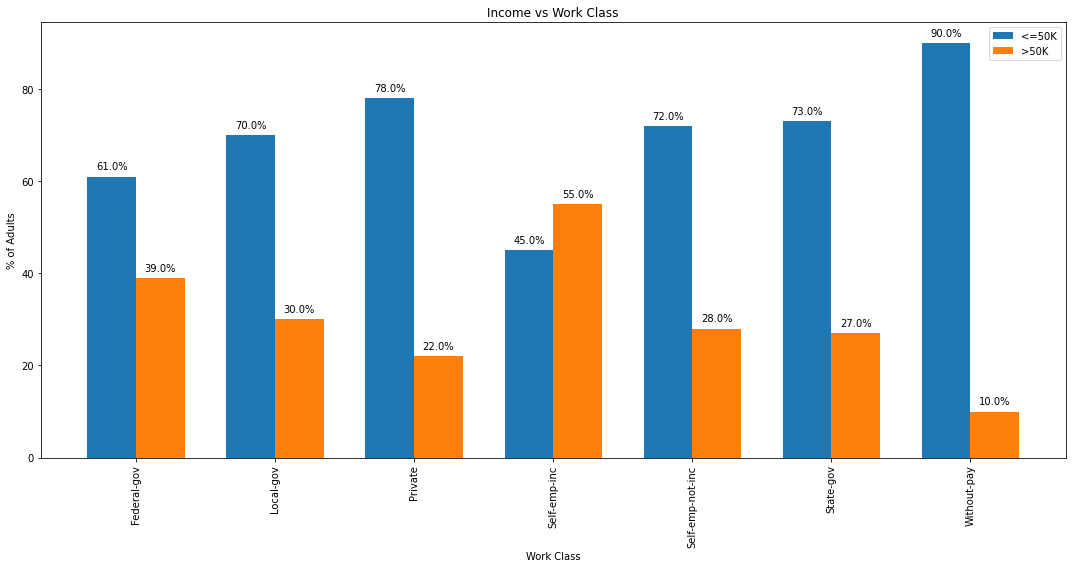

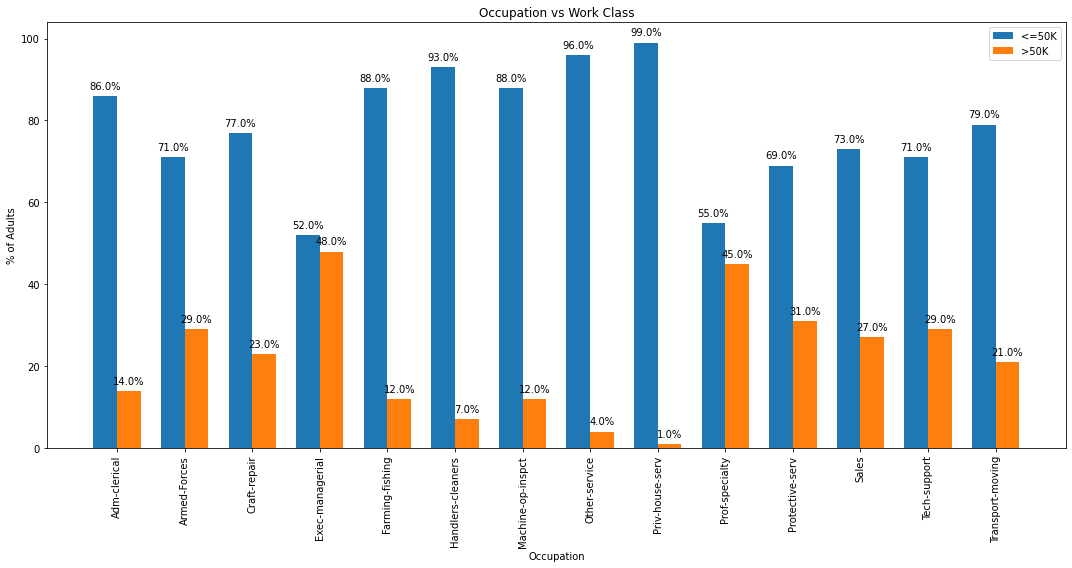

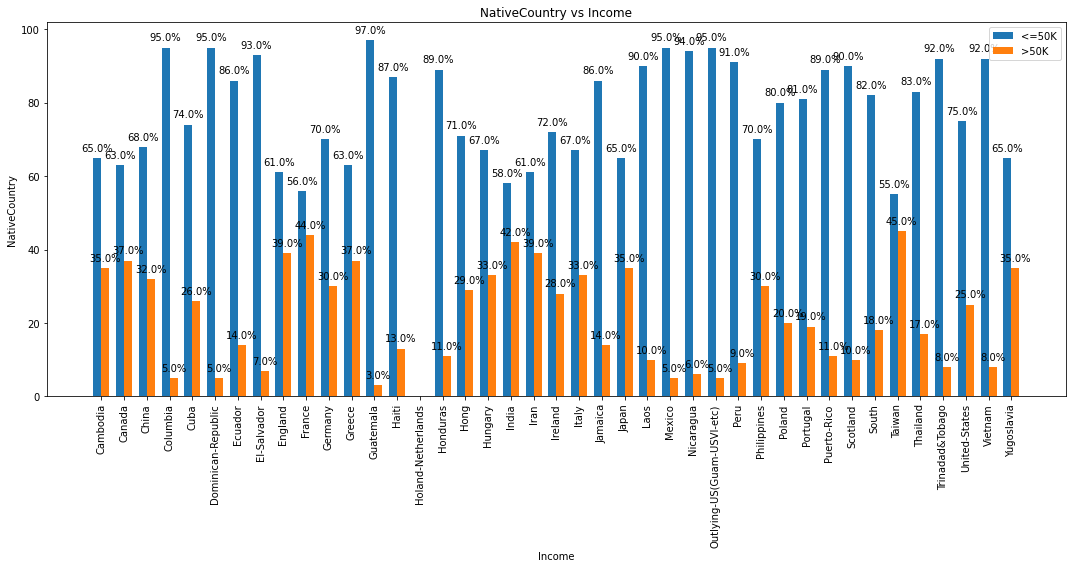

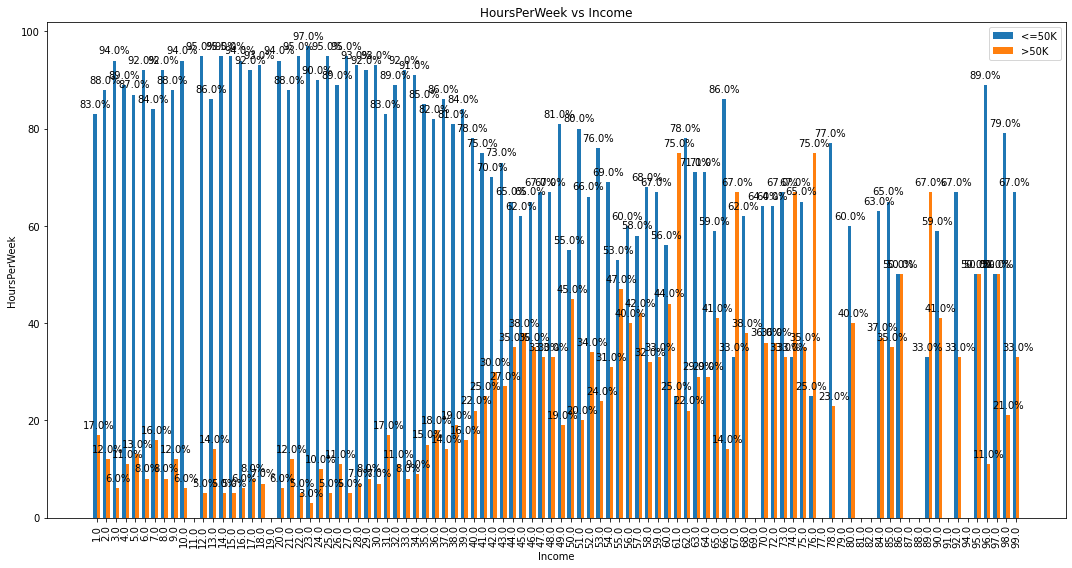

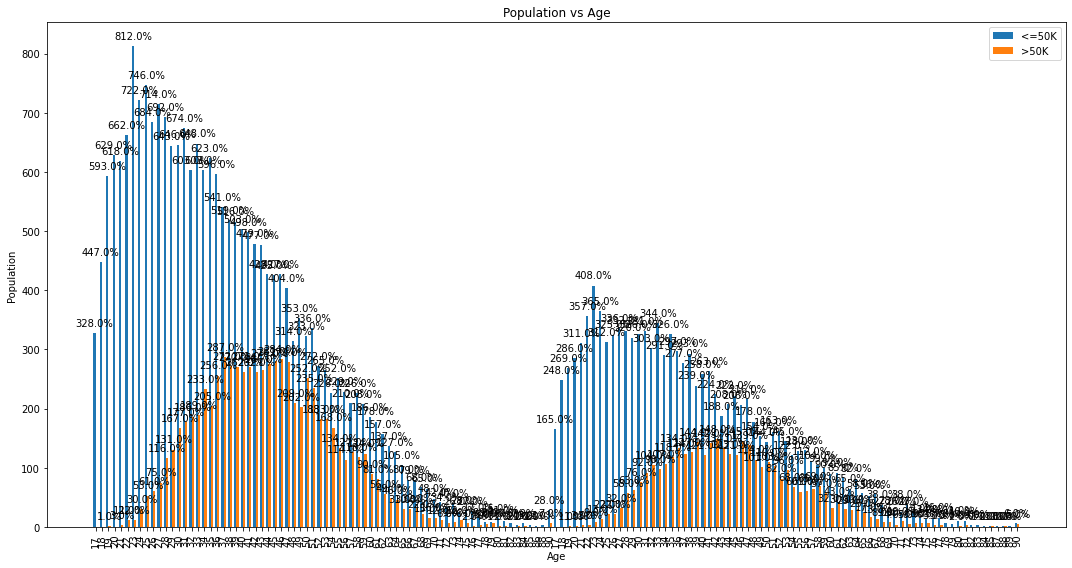

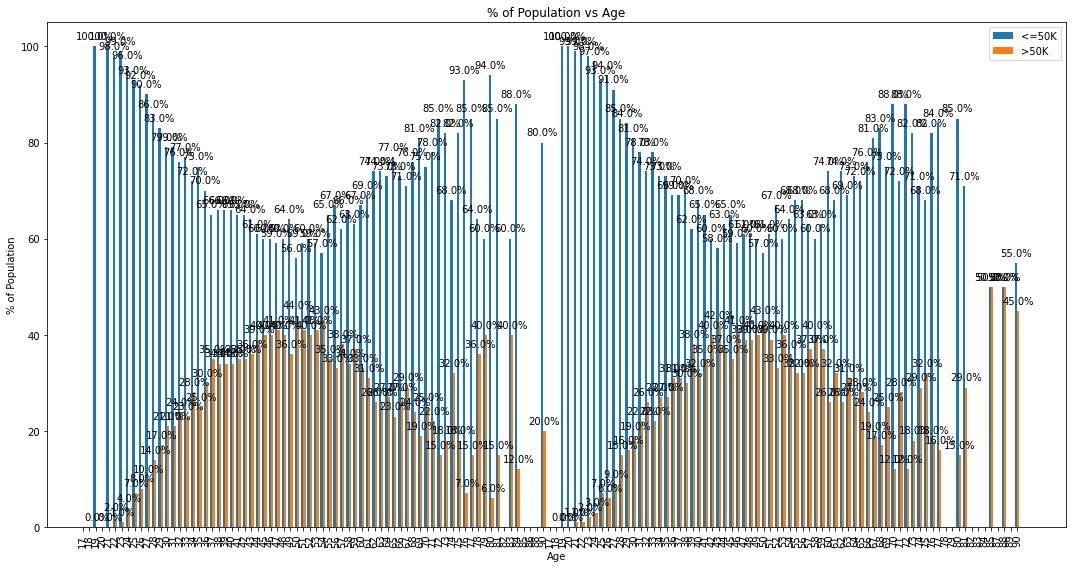

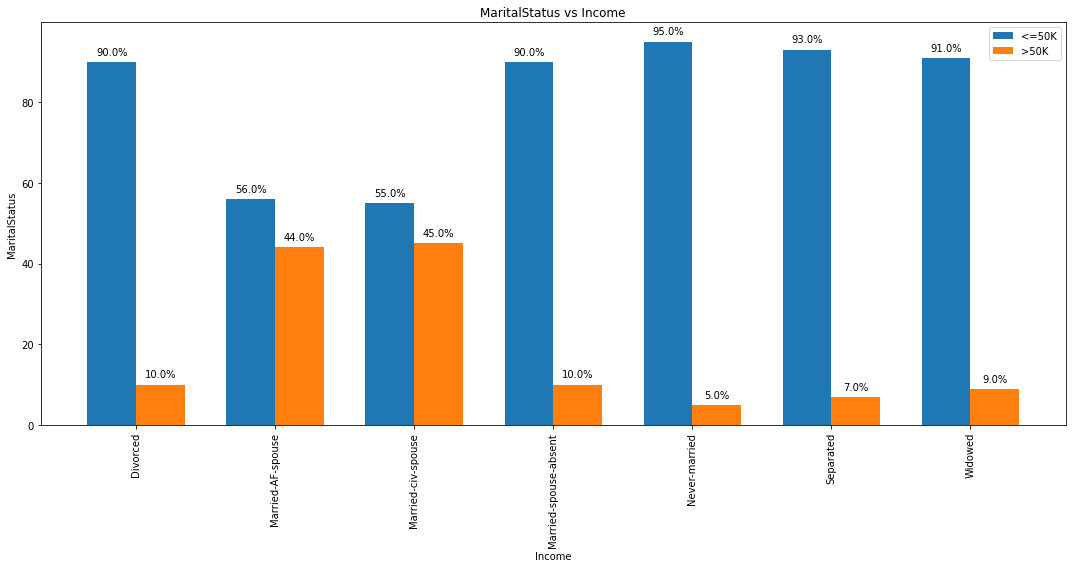

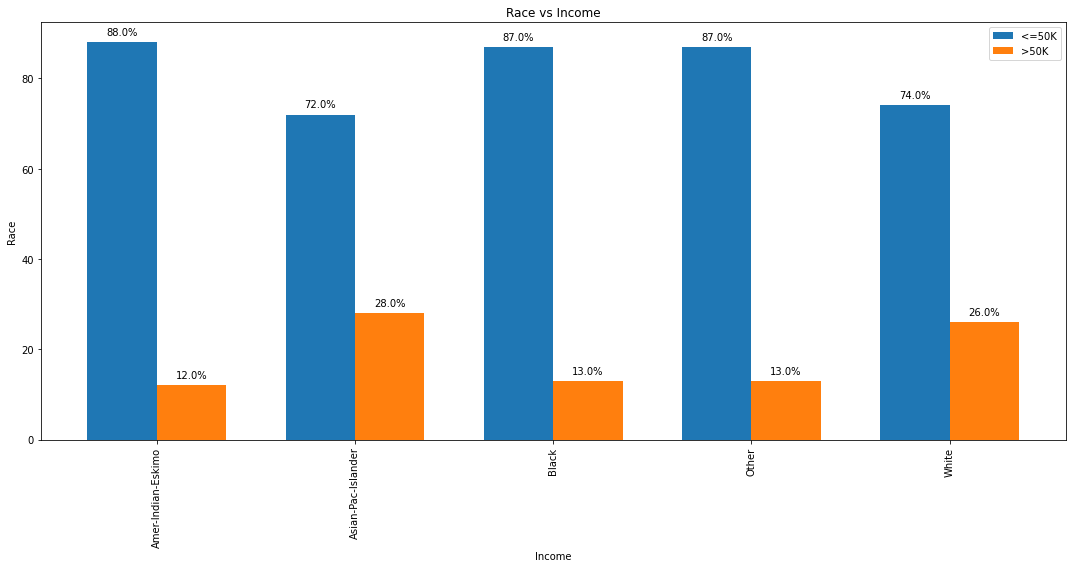

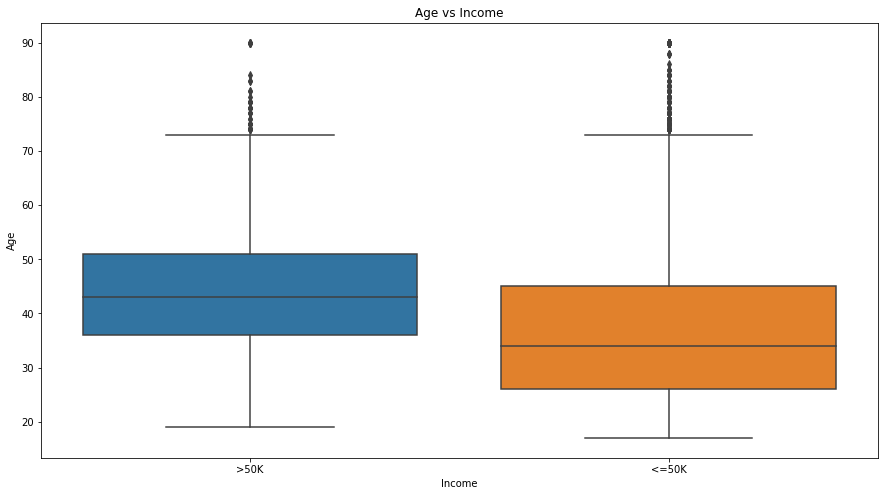

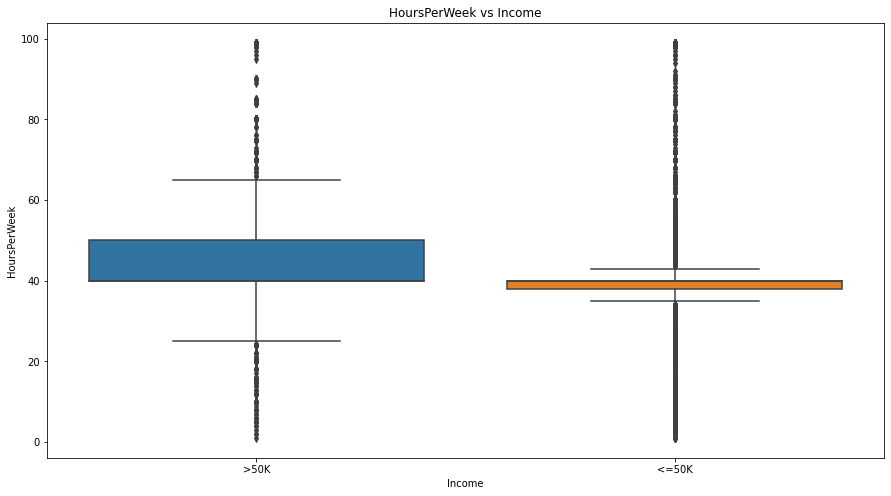

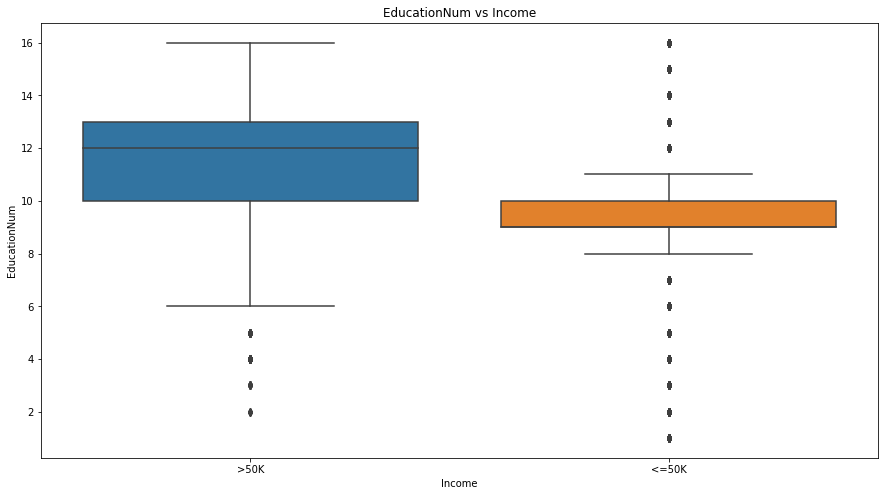

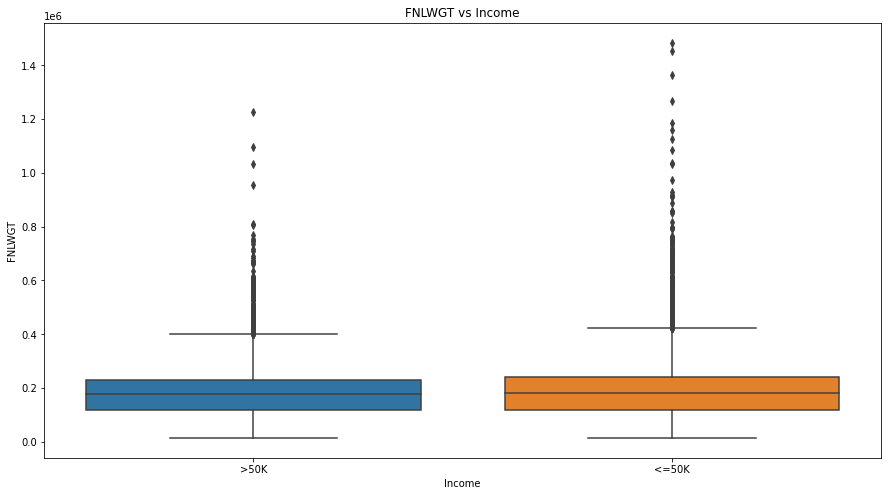

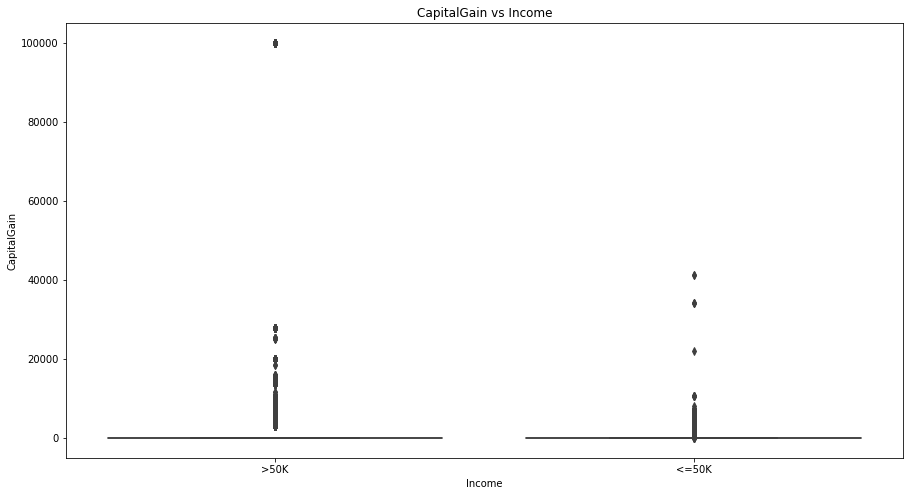

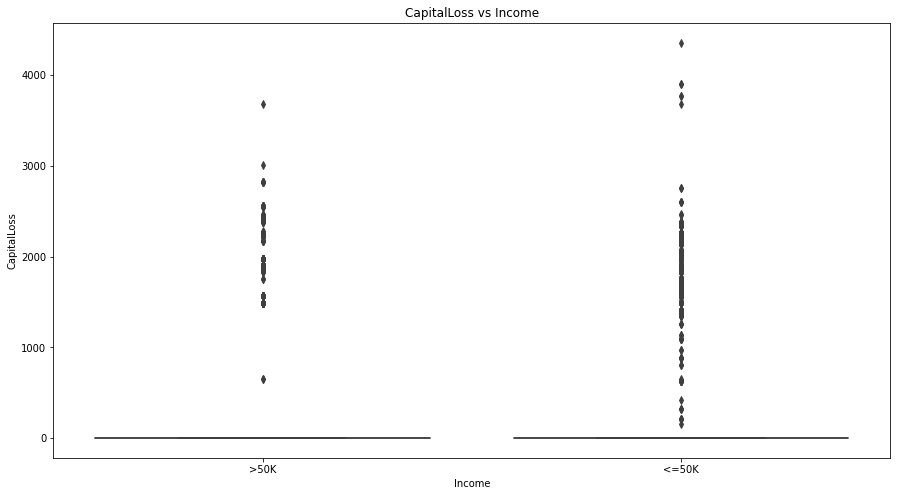

In [12]:
#plot_bar_chart( colname, chart_title, x_label, y_label, absolute_or_normalized(default false))
plot_bar_chart('WorkClass', 'Income vs Work Class', 'Work Class', '% of Adults')
plot_bar_chart('Occupation', 'Occupation vs Work Class', 'Occupation', '% of Adults')
plot_bar_chart('NativeCountry', 'NativeCountry vs Income', 'Income', 'NativeCountry')
plot_bar_chart('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek')
plot_bar_chart('Age', 'Population vs Age', 'Age', 'Population', True)
plot_bar_chart('Age', '% of Population vs Age', 'Age', '% of Population')
plot_bar_chart('MaritalStatus', 'MaritalStatus vs Income', 'Income', 'MaritalStatus')
plot_bar_chart('Race', 'Race vs Income', 'Income', 'Race')


#plot_box_plot( colname, chart_title, x_label, y_label)
plot_box_plot('Age', 'Age vs Income', 'Income', 'Age')
plot_box_plot('HoursPerWeek', 'HoursPerWeek vs Income', 'Income', 'HoursPerWeek')
plot_box_plot('EducationNum', 'EducationNum vs Income', 'Income', 'EducationNum')
plot_box_plot('FNLWGT', 'FNLWGT vs Income', 'Income', 'FNLWGT')
plot_box_plot('CapitalGain', 'CapitalGain vs Income', 'Income', 'CapitalGain')
plot_box_plot('CapitalLoss', 'CapitalLoss vs Income', 'Income', 'CapitalLoss')

In [13]:
def plot_mosaic(dataframe, cols):
    for i in range(len(cols)):
        fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
        fig.subplots_adjust(hspace=.5)
        mosaic(dataframe, [cols[i], 'Income'], ax=axes, axes_label=False)
        plt.title(cols[i] + " and Income Mosaic" )
        plt.show()

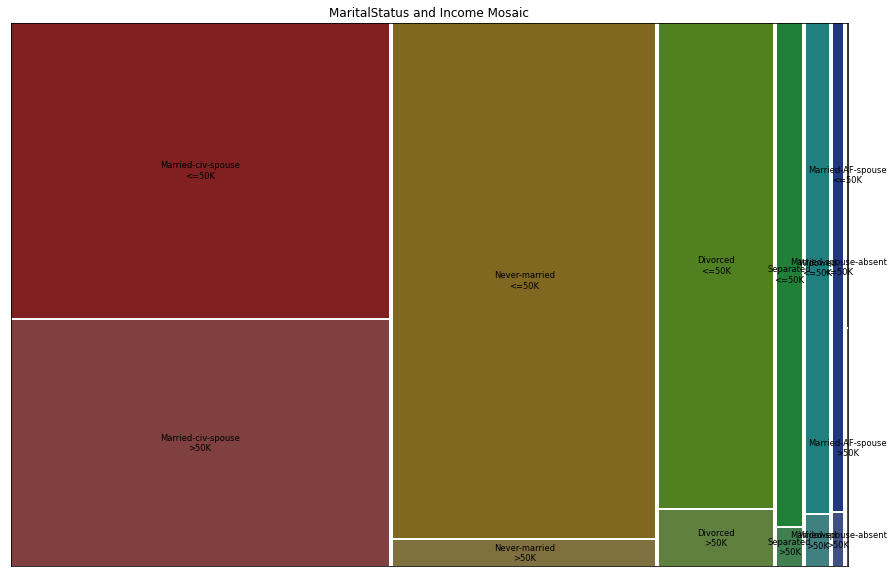

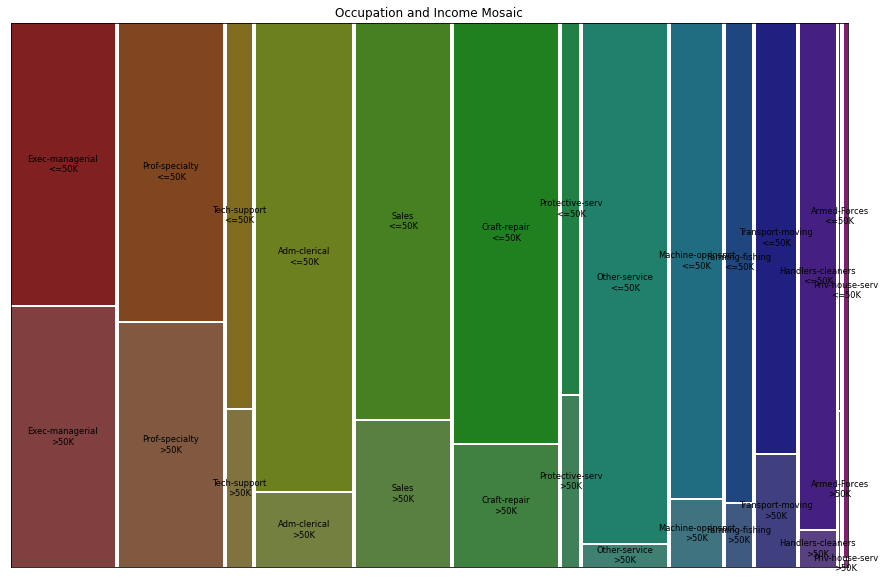

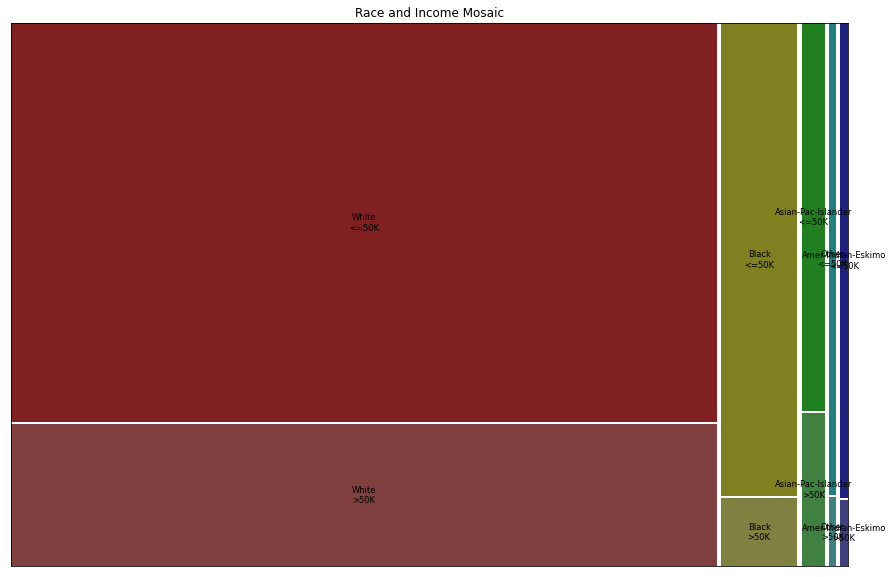

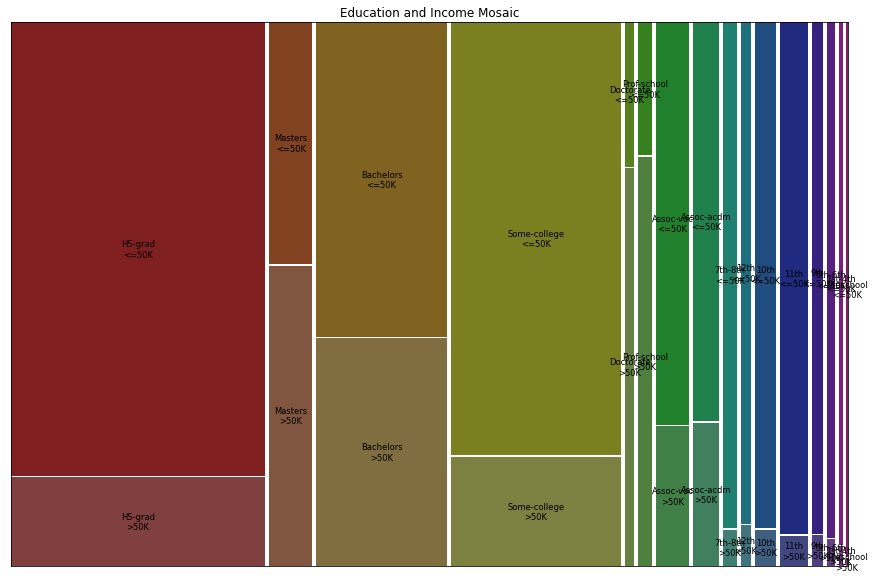

In [14]:
plot_mosaic(concatenate_dataset, ['MaritalStatus', 'Occupation', 'Race', 'Education'])

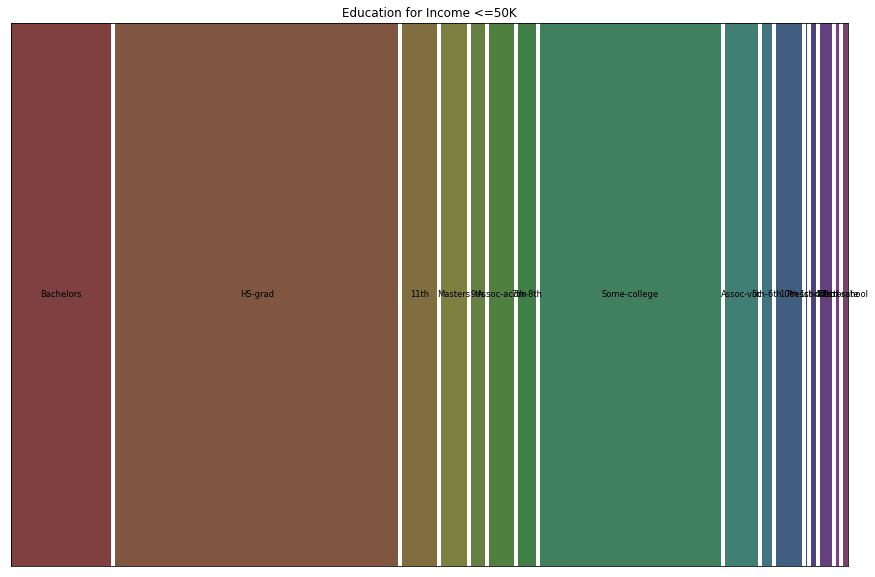

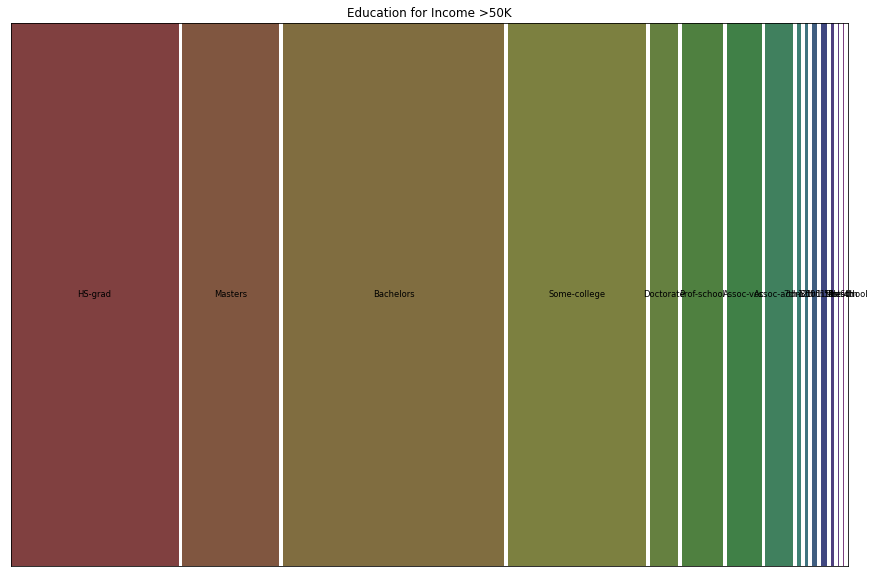

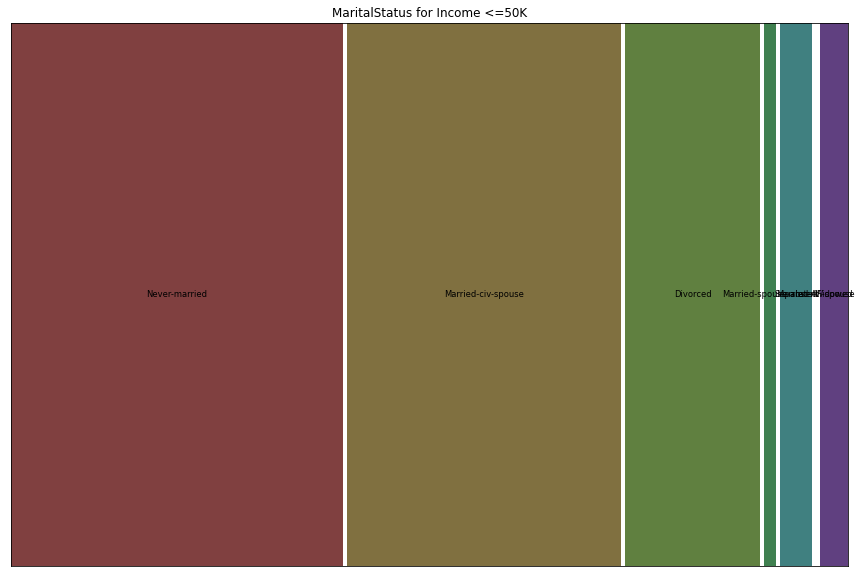

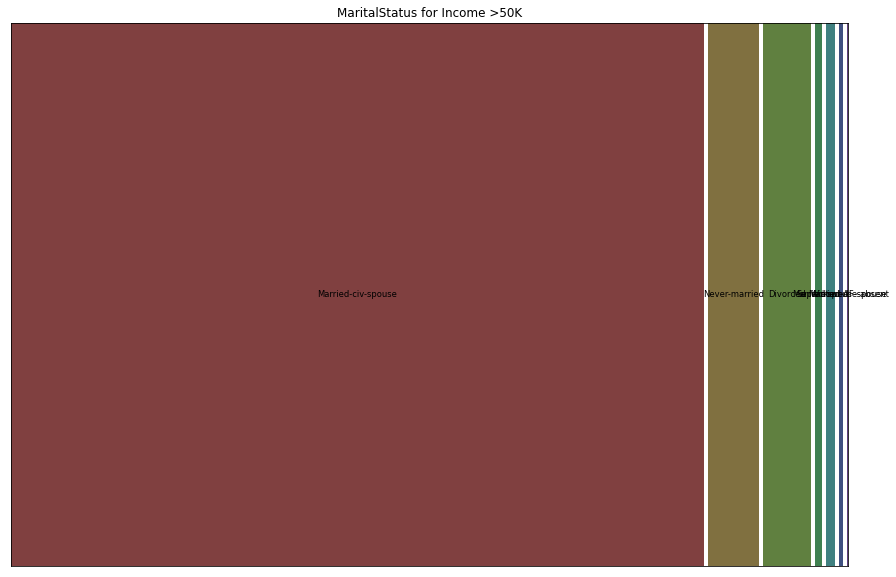

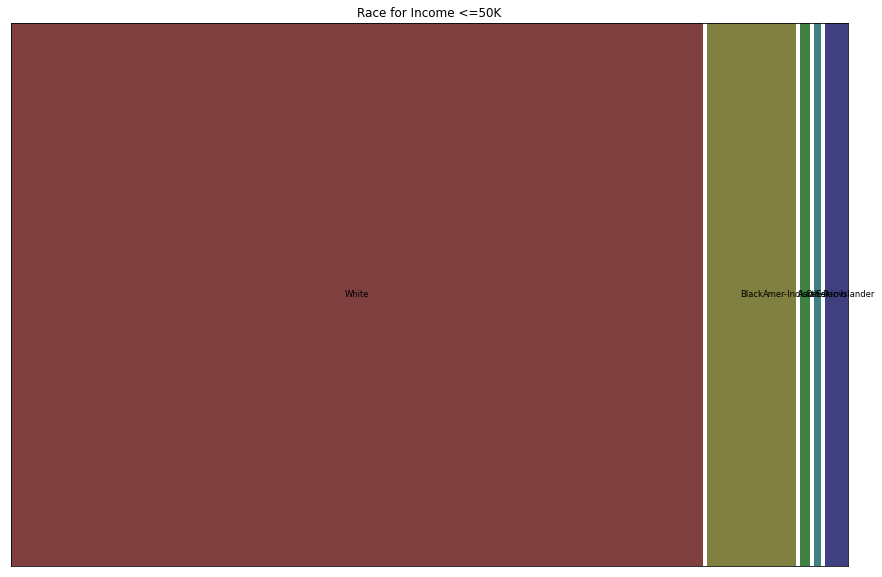

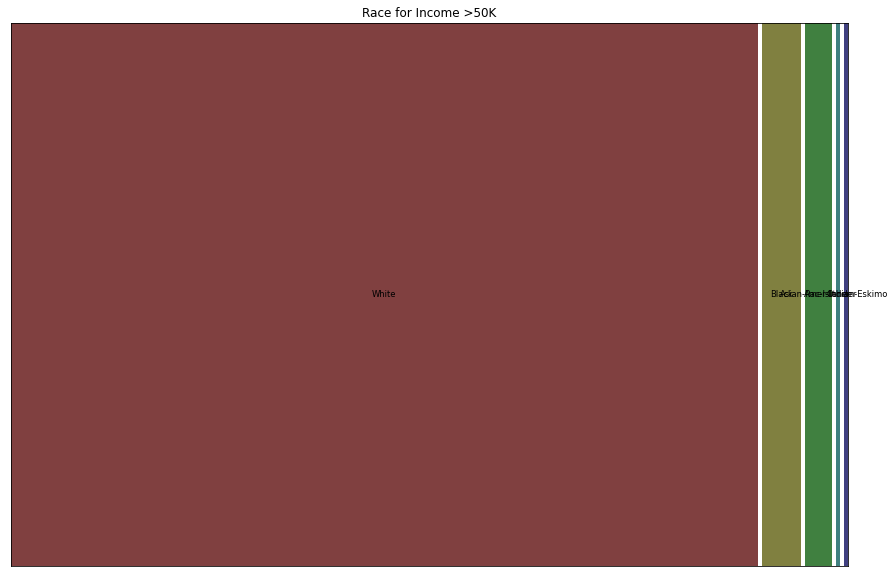

In [15]:
# I don't believe we need this as this can be plotted as bar chart but I have put it here just in case. I plotted one with Marital Status vs Income
def plot_mosaic_range(lower_range, upper_range, cols):
    for i in range(len(cols)):
        fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
        fig.subplots_adjust(hspace=.5)
        mosaic(lower_range, [cols[i]], ax=axes, axes_label=False)
        plt.title(cols[i] + " for Income <=50K")
        plt.show()
        
        fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
        fig.subplots_adjust(hspace=.5)
        mosaic(upper_range, [cols[i]], ax=axes, axes_label=False)
        plt.title(cols[i] + " for Income >50K")
        plt.show()

lower_range = concatenate_dataset[concatenate_dataset["Income"] == "<=50K"]
upper_range = concatenate_dataset[concatenate_dataset["Income"] == ">50K"]
plot_mosaic_range(lower_range, upper_range, ['Education', 'MaritalStatus', 'Race'])

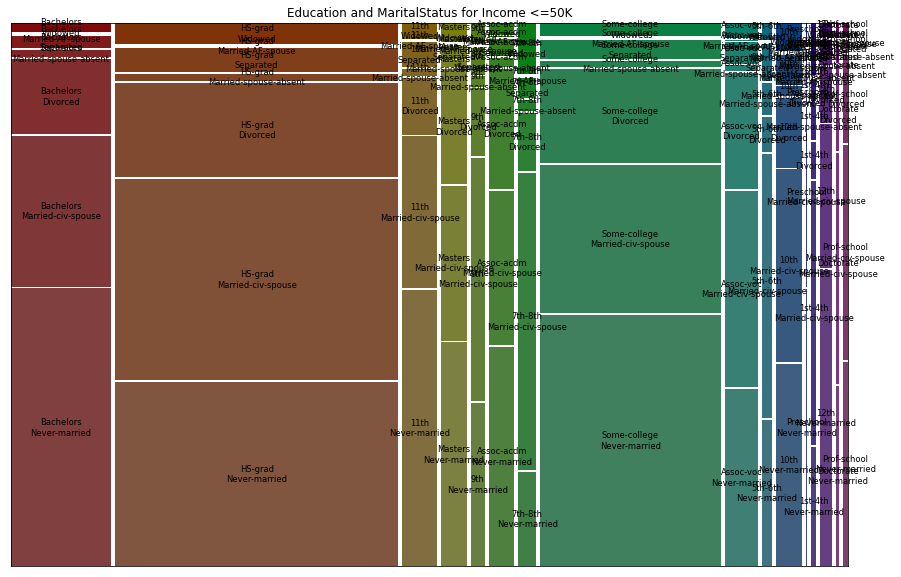

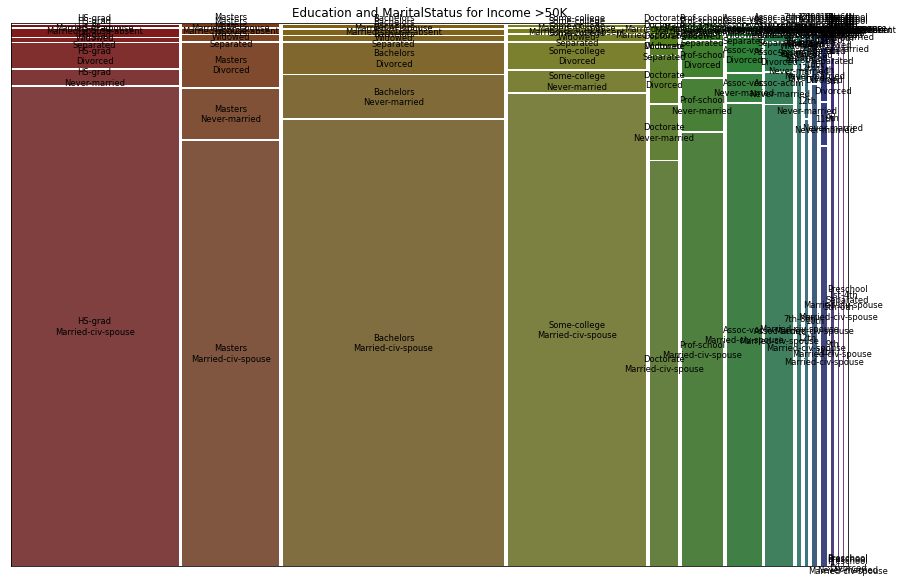

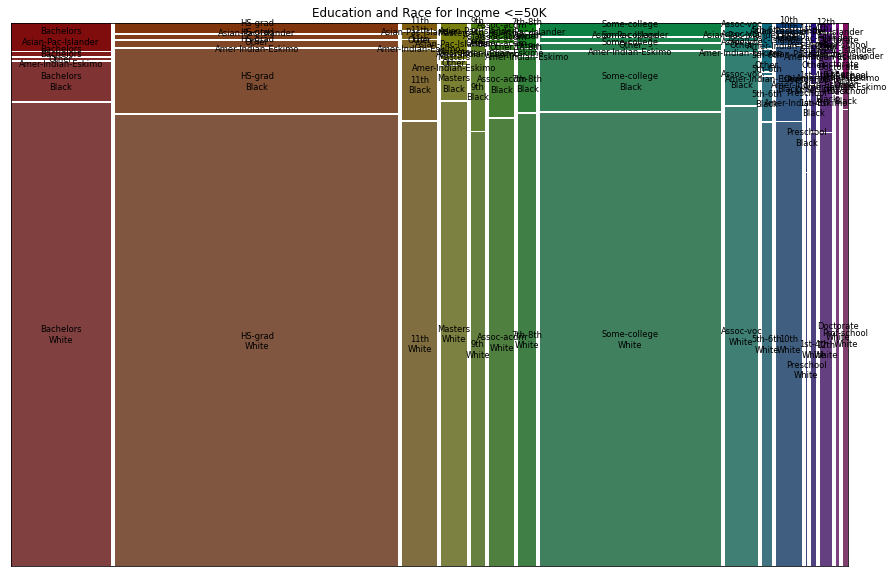

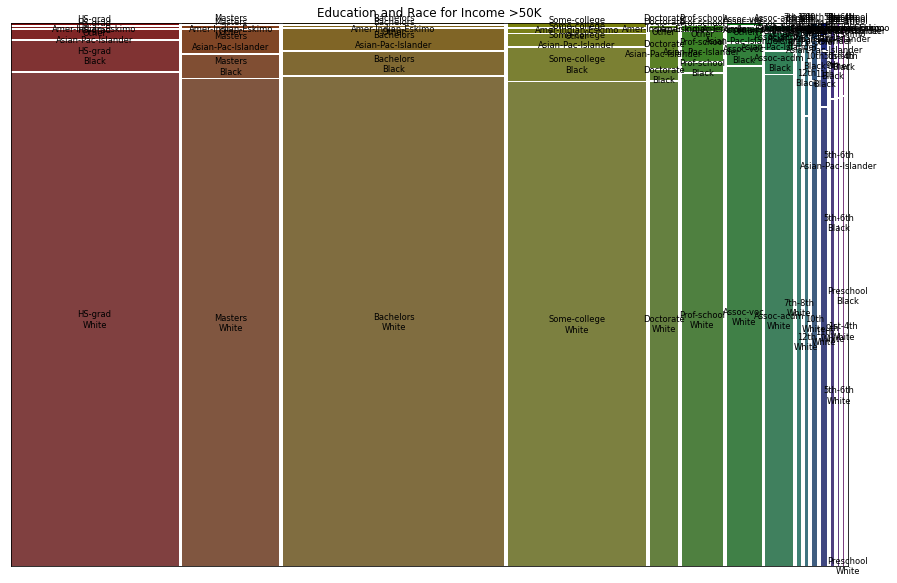

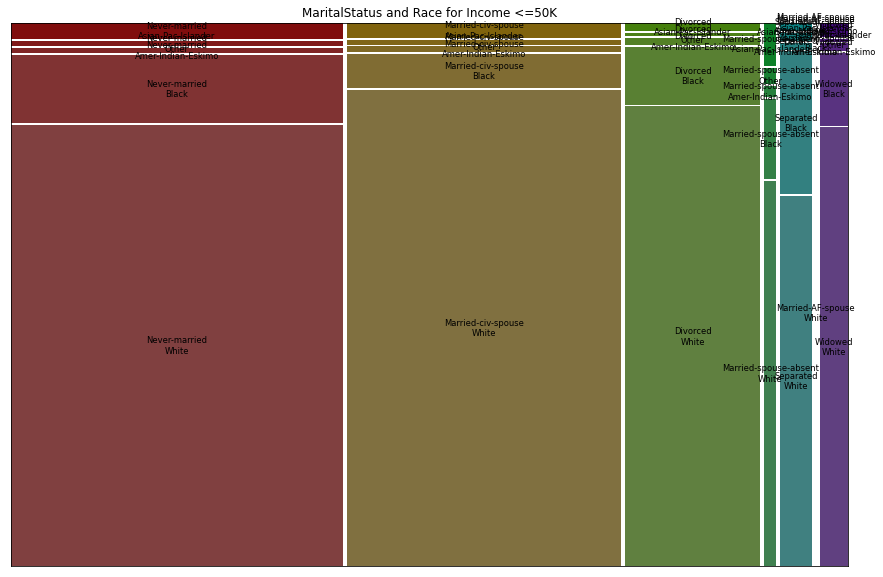

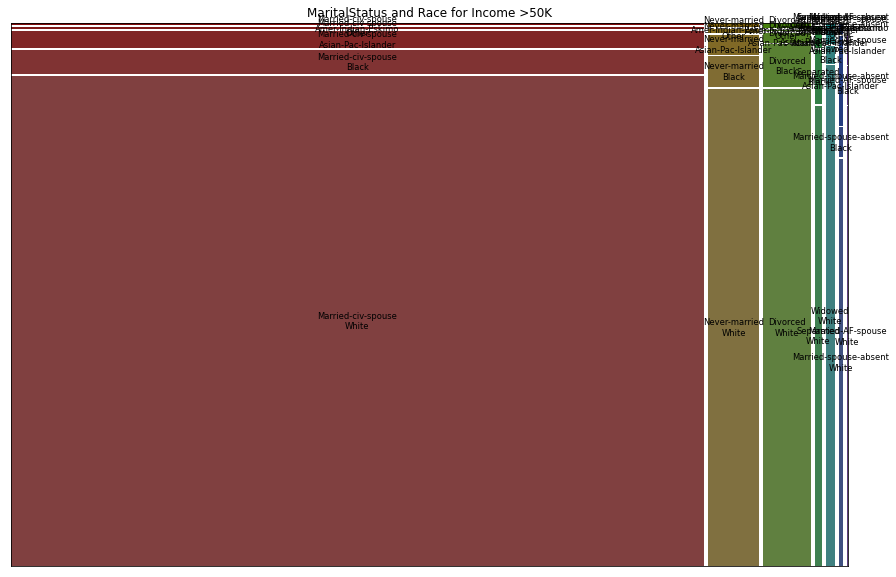

In [16]:
#These are very cluttered. Not sure if we use them but they represent two categorical data with <=50k and >50k in one mosaic
#The rest are just combinations of two categorical columns passed to the method
def plot_mult_col_mosaic(lower_range, upper_range, cols):
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
            fig.subplots_adjust(hspace=.5)
            mosaic(lower_range, [cols[i], cols[j]], ax=axes, axes_label=False)
            plt.title(cols[i] + " and " + cols[j] + " for Income <=50K")
            plt.show()

            fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
            fig.subplots_adjust(hspace=.5)
            mosaic(upper_range, [cols[i], cols[j]], ax=axes, axes_label=False)
            plt.title(cols[i] + " and " + cols[j] + " for Income >50K")
            plt.show()
lower_range = concatenate_dataset[concatenate_dataset["Income"] == "<=50K"]
upper_range = concatenate_dataset[concatenate_dataset["Income"] == ">50K"]
plot_mult_col_mosaic(lower_range, upper_range, ['Education', 'MaritalStatus', 'Race'])

In [19]:
def ana_cat_dat(column):
    upper = Counter(above[column])
    lower = Counter(below[column])
    
    keys = list(upper.items())
    random.shuffle(keys)
    upper = dict(keys)
    
    keys = list(lower.items())
    random.shuffle(keys)
    upper = dict(keys)
    
    print()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,15))
    explode_val = [0.2] * (len(upper.keys()))
    axes[0].pie(upper.values(), labels=upper.keys(), autopct='%1.0f%%', explode = explode_val, counterclock = False)
    axes[0].legend(upper.keys(), loc="upper right", bbox_to_anchor=(1.5, 1))
    axes[0].set_title(">50K")
    axes[1].pie(lower.values(), labels=lower.keys(), autopct='%1.0f%%', explode = explode_val, counterclock = False)
    axes[1].legend(lower.keys(), loc="upper right", bbox_to_anchor=(1.5, 1))
    axes[1].set_title("<=50K")
    plt.show()
    

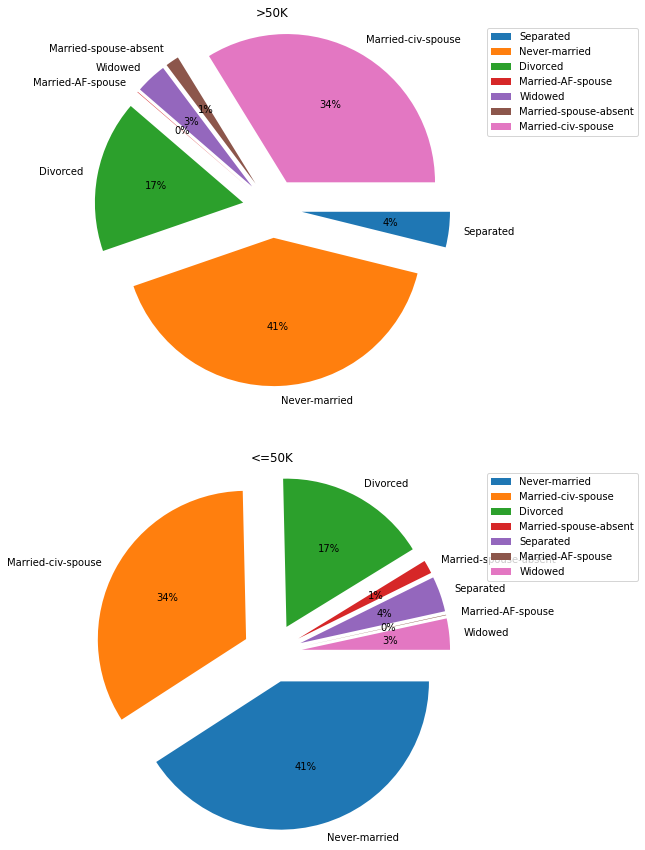

In [20]:
below = concatenate_dataset[concatenate_dataset["Income"] == "<=50K"]
above = concatenate_dataset[concatenate_dataset["Income"] == ">50K"]
ana_cat_dat("MaritalStatus")

In [21]:
def ana_per_unique(column):
    unique_values = concatenate_dataset[column].unique()
    plt.close()
    
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5,5 * len(unique_values)))

    for i, val in enumerate(unique_values):
        val_df = concatenate_dataset[concatenate_dataset[column] == val]
        upper = val_df[val_df["Income"] == ">50K"]
        lower = val_df[val_df["Income"] == "<=50K"]
        axes[i].pie([len(lower.index), len(upper.index)], labels=["<=50K (Count-" + str(len(lower.index)) + ")", ">50K (Count-" + str(len(upper.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    
    plt.show()

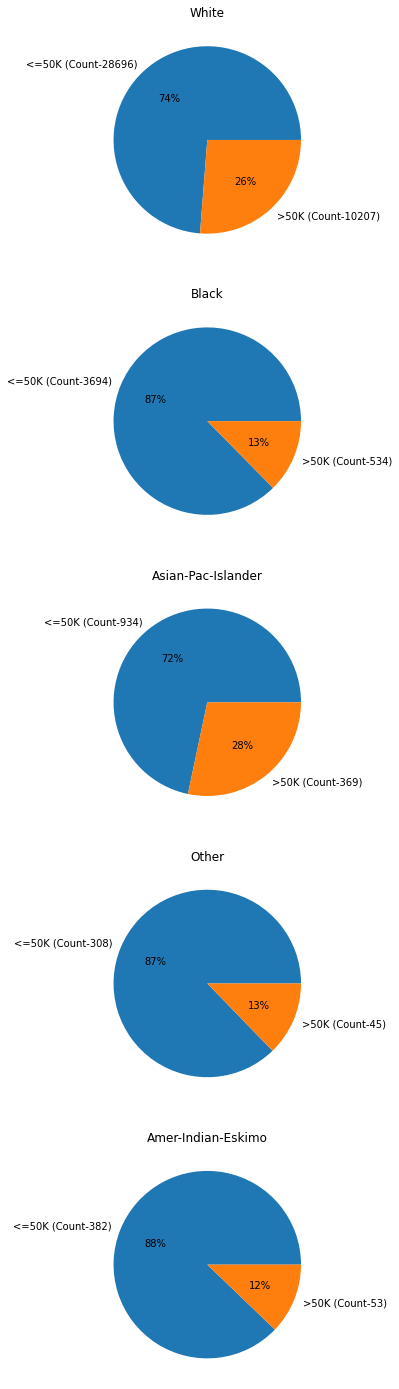

In [22]:
ana_per_unique("Race")